In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/day_01.csv")

In [ ]:
df.head()

,day,time,0,1,2,3,4,5,6,7,...,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092
0,1,86400,NaN,NaN,NaN,7635,6832,NaN,845,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,86460,NaN,NaN,NaN,6924,6187,NaN,991,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,86520,NaN,NaN,NaN,6188,5614,NaN,1133,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,86580,NaN,NaN,NaN,5106,4534,NaN,1141,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,86640,NaN,NaN,NaN,4533,4040,NaN,1239,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def create_lags(df):
  df['lag_1'] = df['total_invocations'].shift(1)
  df['lag_2'] = df['total_invocations'].shift(2)
  df['lag_3'] = df['total_invocations'].shift(3)

  # random initial values for first row
  df['lag_1'].iloc[0] = np.random.randint(400, 600)
  df['lag_2'].iloc[0:2] = np.random.randint(400, 600, size=2)
  df['lag_3'].iloc[0:3] = np.random.randint(400, 600, size=3)
  return df


In [ ]:
def preprocess_data(df):
  # Set reference start date (01 Nov 2023)
  start_date = pd.Timestamp("2023-11-01 00:00:00")
  df['datetime'] = start_date + pd.to_timedelta(df['time'], unit='s')

  # did the forward fill
  df = df.fillna(method='ffill', axis=1).fillna(0)

  # replaced columns named 0,1 and 2 with 0 since no prevoius value
  df[['0', '1', '2']] = 0

  function_columns = df.columns.difference(['day', 'time', 'datetime'])

  scaler = MinMaxScaler()
  df[function_columns] = scaler.fit_transform(df[function_columns])

  # sum the values from column named from 0 to 5092
  function_columns = df.columns.difference(['day', 'time', 'datetime'])
  df['total_invocations'] = df[function_columns].sum(axis=1).astype(int)
  # Retain only relevant columns
  df = df[['datetime', 'total_invocations']]

  create_lags(df)

  return df

In [ ]:
df = preprocess_data(df)

<ipython-input-4-e66d169d3a54>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_invocations'] = df[function_columns].sum(axis=1).astype(int)
<ipython-input-3-3b532b98f375>:7: FutureWarni

# Regression

### Linear Regression Model

In [ ]:
# Define features (X) and target variable (y)
X = df[["lag_1", "lag_2", "lag_3"]]
y = df["total_invocations"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Split data into training and testing sets (80% train, 20% test)
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_lr_train, y_lr_train)

# Predict on the test set
y_lr_pred = model.predict(X_lr_test)

# Evaluate the model
mae = mean_absolute_error(y_lr_test, y_lr_pred)
rmse = np.sqrt(mean_squared_error(y_lr_test, y_lr_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 94.53405859483314
Root Mean Squared Error (RMSE): 163.4251293643243


### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR

# Split the data into training and testing sets
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_svm_train, y_svm_train)

# Predict on the test set
y_svm_pred = svm_model.predict(X_svm_test)

# Evaluate the model
mse = mean_squared_error(y_svm_test, y_svm_pred)
rmse = np.sqrt(mean_squared_error(y_svm_test, y_svm_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Print predictions and actual values
# print('Predictions:', y_pred)
# print('Actual values:', y_test.values)

Mean Absolute Error (MAE): 94.53405859483314
Root Mean Squared Error (RMSE): 93.39709116903761


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_rf_train, y_rf_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_rf_test)

# Evaluate the model
mse = mean_squared_error(y_rf_test, y_rf_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 7784.924103607253
Root Mean Squared Error (RMSE): 88.23221692560634


### Plot between Actual and Predicted Values

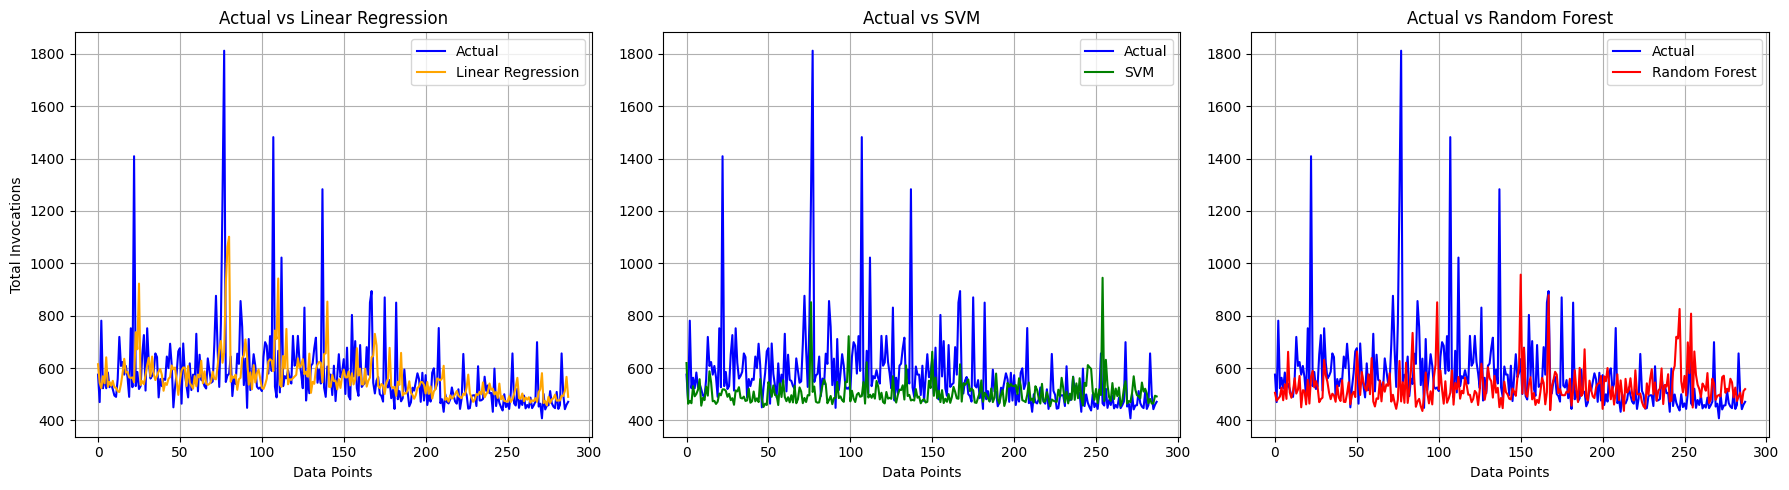

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  Actual vs Linear Regression
axes[0].plot(y_test.values, label="Actual", color="blue")
axes[0].plot(y_lr_pred, label="Linear Regression", color="orange")
axes[0].set_title("Actual vs Linear Regression")
axes[0].set_xlabel("Data Points")
axes[0].set_ylabel("Total Invocations")
axes[0].legend()
axes[0].grid(True)

#  Actual vs SVM
axes[1].plot(y_test.values, label="Actual", color="blue")
axes[1].plot(y_svm_pred, label="SVM", color="green")
axes[1].set_title("Actual vs SVM")
axes[1].set_xlabel("Data Points")
axes[1].legend()
axes[1].grid(True)

#  Actual vs Random Forest
axes[2].plot(y_test.values, label="Actual", color="blue")
axes[2].plot(y_rf_pred, label="Random Forest", color="red")
axes[2].set_title("Actual vs Random Forest")
axes[2].set_xlabel("Data Points")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Classification

### Logistic Regression Model

In [ ]:
def get_classification_data():
  cdf = pd.read_csv("/content/day_01.csv")
  cdf = preprocess_data(cdf)
  threshold = 500  # Define a threshold
  cdf['target'] = cdf['total_invocations'].apply(lambda x: 1 if x >= threshold else 0)

  return cdf


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Features and target variable
lrdf = get_classification_data()
X = lrdf[['lag_1', 'lag_2', 'lag_3']]
y = lrdf['target']

# Split the data
X_lor_train, X_lor_test, y_lor_train, y_lor_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_lor_train, y_lor_train)

# Predict
y_lor_pred = log_reg.predict(X_lor_test)

# Evaluate
print("Accuracy:", accuracy_score(y_lor_test, y_lor_pred))
print("Classification Report:\n", classification_report(y_lor_test, y_lor_pred))

<ipython-input-4-e66d169d3a54>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill', axis=1).fillna(0)


Accuracy: 0.6736111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.70       148
           1       0.69      0.59      0.64       140

    accuracy                           0.67       288
   macro avg       0.68      0.67      0.67       288
weighted avg       0.68      0.67      0.67       288



<ipython-input-4-e66d169d3a54>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_invocations'] = df[function_columns].sum(axis=1).astype(int)
<ipython-input-3-3b532b98f375>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform t

### Support vector machines

In [ ]:
svdf = get_classification_data()
X = svdf[['lag_1', 'lag_2', 'lag_3']]
y = svdf['target']

X_svm2_train, X_svm2_test, y_svm2_train, y_svm2_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-4-e66d169d3a54>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_invocations'] = df[function_columns].sum(axis=1).astype(int)
<ipython-input-3-3b532b98f375>:7: FutureWarni

In [ ]:
from sklearn.svm import SVC
# Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf' or 'poly'
svm_model.fit(X_svm2_train, y_svm2_train)

# Predict with SVM
y_pred_svm = svm_model.predict(X_svm2_test)

# Evaluate SVM
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_svm2_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_svm2_test, y_pred_svm))


SVM Results:
Accuracy: 0.7013888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73       148
           1       0.74      0.59      0.66       140

    accuracy                           0.70       288
   macro avg       0.71      0.70      0.70       288
weighted avg       0.71      0.70      0.70       288



### Random Forest Classifier

In [ ]:
rfdf2 = get_classification_data()
X = rfdf2[['lag_1', 'lag_2', 'lag_3']]
y = rfdf2['target']

# Split the data
X_rfdf2_train, X_rfdf2_test, y_rfdf2_train, y_rfdf2_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-4-e66d169d3a54>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(method='ffill', axis=1).fillna(0)
<ipython-input-4-e66d169d3a54>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_invocations'] = df[function_columns].sum(axis=1).astype(int)
<ipython-input-3-3b532b98f375>:7: FutureWarni

In [ ]:
rfdf2['target']

,target
0,1
1,1
2,0
3,0
4,1
...,...
1435,1
1436,0
1437,0
1438,0


In [ ]:
print(y_rfdf2_train.unique())  # Check unique values in the target variable
print(y_rfdf2_test.unique())   # Check unique values in the test set

[1 0]
[1 0]


In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 1152
Testing set size: 288


In [ ]:
print(y_train.value_counts())  # Check class distribution in the training set

total_invocations
511     19
443     17
453     16
451     14
458     14
        ..
760      1
887      1
1019     1
751      1
721      1
Name: count, Length: 289, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_rfdf2_train, y_rfdf2_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_rfdf2_test)

# Evaluate Random Forest
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_rfdf2_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_rfdf2_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7118055555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       148
           1       0.71      0.68      0.70       140

    accuracy                           0.71       288
   macro avg       0.71      0.71      0.71       288
weighted avg       0.71      0.71      0.71       288



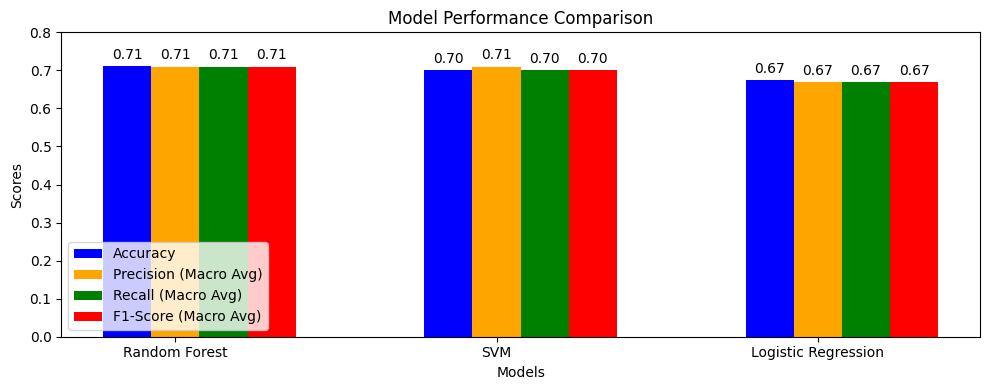

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Random Forest, SVM, and Logistic Regression
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracy = [0.7118, 0.7014, 0.6736]  # Accuracy values
precision = [0.71, 0.71, 0.67]       # Precision values (macro avg)
recall = [0.71, 0.70, 0.67]          # Recall values (macro avg)
f1_score = [0.71, 0.70, 0.67]        # F1-score values (macro avg)

x = np.arange(len(models))  # Label locations
width = 0.15  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 4))

# Plot bars for each metric
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='blue')
rects2 = ax.bar(x, precision, width, label='Precision (Macro Avg)', color='orange')
rects3 = ax.bar(x + width, recall, width, label='Recall (Macro Avg)', color='green')
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-Score (Macro Avg)', color='red')


ax.set_ylim(0, 0.8)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()